<a href="https://colab.research.google.com/github/trisha194/Yoga-Recommender-System-/blob/main/SentimentAnalysis_TwitterPost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re

In [ ]:
df=pd.read_csv("/content/tweet_emotions.csv")

In [ ]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [ ]:
df.drop("tweet_id", axis=1, inplace=True)
df

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
def remove_mentions(text):
    return re.sub(r"@\w+", "", text)

# Cleaning content only if it contains '@username'
df["content"] = df["content"].apply(lambda x: remove_mentions(x) if "@" in x else x)

In [ ]:
df

,sentiment,content
0,empty,i know i was listenin to bad habit earlier a...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,We want to trade with someone who has Houston...
...,...,...
39995,neutral,
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  40000 non-null  object
 1   content    40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


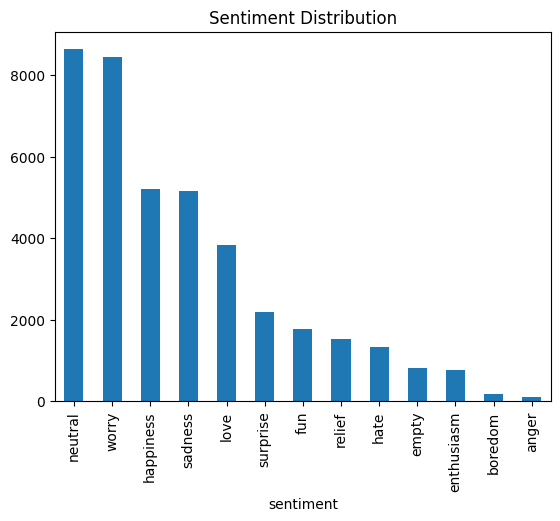

In [ ]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
neutral,8638
worry,8459
happiness,5209
sadness,5165
love,3842
surprise,2187
fun,1776
relief,1526
hate,1323


In [ ]:
# Filtering rows where sentiment is 'anger'
anger_sentences = df[df['sentiment'] == 'anger']

# Displaying the first few rows to verify
print(anger_sentences[['sentiment', 'content']].head(10))

     sentiment                                            content
494      anger                              fuckin'm transtelecom
527      anger                   Working   But it's Fridaaaayyyyy
612      anger                         Packing  I don't like it..
1377     anger  I tried to dye my hair and all i got was a blo...
1384     anger  &quot;locked up abroad&quot; makes bein half b...
1498     anger                                     damned hordies
1993     anger            yes, boo for soar throats and earaches!
2135     anger  My stomach is all EXPLODE from the wendys  why...
2619     anger   Hey, Wahts happening in #coffeclub..? I didnt...
2629     anger  Did a historical Jesus ever exist? Im finding ...


In [ ]:
import pandas as pd

# New anger sentences
anger_sentences = [
    "I can't believe they did this to me!",
    "Why does this always happen to me? It's so frustrating!",
    "This is completely unacceptable!",
    "I'm so mad right now, I can't even think straight.",
    "They have no right to treat me like this!",
    "This is the last time I'm putting up with this nonsense.",
    "How could they mess this up so badly?",
    "I'm furious about the way things turned out!",
    "It's infuriating to see such incompetence.",
    "I'm tired of being taken for granted!",
    "I’m done with this, I can’t take it anymore!",
    "This is absolute nonsense!",
    "I’m so pissed off right now, I could scream!",
    "They really crossed the line this time.",
    "I don't know how much longer I can tolerate this.",
    "This situation is completely out of hand!",
    "I am so tired of being disrespected like this!",
    "I can't believe how stupid this is!",
    "Every time I try, everything falls apart!",
    "Why does everything have to go wrong when I’m involved?",
    "I’m so angry I don’t even know what to do!",
    "This is driving me insane!",
    "I can't stand this anymore, it's too much!",
    "Why does everyone make things so difficult for me?",
    "This is the worst thing that’s happened to me in a long time!",
    "I don’t want to hear excuses, just fix it!",
    "It’s infuriating when people don’t listen!",
    "I’m fed up with this entire situation!",
    "This is beyond frustrating!",
    "It’s unbelievable how much I’m being treated unfairly.",
    "I can't believe this is happening to me again!",
    "I’m so angry, I can barely think straight.",
    "I’m losing my patience with all this nonsense.",
    "Why does everything always go wrong when I need it to go right?",
    "This is getting out of hand, and I’m done with it.",
    "It’s so annoying how people never listen!",
    "I’m really getting fed up with the constant mistakes!",
    "Why can’t anyone do anything right?",
    "I just want to explode because of all this stress.",
    "It feels like I’m being treated like a fool!",
    "I don’t deserve this kind of treatment!",
    "I’m so mad that I can’t even express how I feel.",
    "This is such a mess, I’m so pissed off.",
    "Every time I turn around, there's another problem to deal with!",
    "I'm done with all this drama; it’s making me so angry.",
    "I can't stand how incompetent everyone is!",
    "It's unbelievable how people can be so disrespectful.",
    "I can’t believe how unfairly I’m being treated!",
    "I just want to yell at someone right now!",
    "This is driving me crazy, and I’m getting more upset by the minute.",
    "I can't believe they think this is okay!",
    "This is absolutely ridiculous!",
    "How many times do I have to say it before someone listens?",
    "I'm done being patient with this nonsense!",
    "Why does everyone think they can walk all over me?",
    "This is the last straw, I'm not putting up with it anymore.",
    "I’m so angry I could punch something!",
    "I’m sick of trying to fix everyone’s messes.",
    "It’s so frustrating when nothing ever goes right.",
    "Why is it so hard to get things done around here?",
    "I’ve had enough, I can’t take this anymore!",
    "It’s unbelievable how careless people can be!",
    "This situation is totally unacceptable, and I won’t stand for it!",
    "I can’t even look at this anymore, I’m so pissed.",
    "I’m done with excuses, I need results!",
    "I’ve never been this frustrated in my life!",
    "I just want to scream, this is infuriating!",
    "I can’t believe how disrespectful people are!",
    "This is completely unfair, and I’m not going to stay quiet about it!",
    "I can't stand being ignored anymore.",
    "I’m done being nice about this!",
    "Why do people keep making the same mistakes over and over?",
    "I don’t know how much longer I can tolerate this stupidity!",
    "This is so frustrating, I can’t deal with it!",
    "I feel like nobody respects me at all!",
    "I’m furious at the way I’ve been treated!",
    "I don’t know why everything always turns into a disaster.",
    "Why does everything have to be so complicated?",
    "It’s getting harder to stay calm with this nonsense.",
    "Why is it so difficult to get people to understand simple instructions?",
    "I’ve had enough of this garbage, I can’t believe it!",
    "I can't even look at this without getting angry.",
    "This is so annoying, it's unbearable.",
    "How can people be so inconsiderate?",
    "I’ve been more patient than anyone should be, but this is too much.",
    "I'm so angry I can't even put it into words.",
    "It’s absolutely maddening how much time has been wasted.",
    "I’m done with all the lies, I can’t stand it anymore.",
    "Every little thing about this situation is infuriating!",
    "I don’t care anymore, I’m so done with this.",
    "I’m so done with this mess, I can’t even think straight!",
    "I can't stand the way people treat me like I don't matter.",
    "This situation is a total nightmare!",
    "I'm fed up with this, it's time for a change!",
    "I don’t deserve to be treated like this!",
    "I can't believe how disrespectful people are!",
    "I’m so angry I’m about to lose my cool.",
    "This is driving me crazy!",
    "I can't deal with these constant issues anymore.",
    "Why do I always have to clean up everyone else’s mess?",
    "This whole thing is just one big disaster.",
    "I'm losing my patience with this nonsense.",
    "How can things keep going wrong like this?",
    "I’m so furious right now, I’m shaking!",
    "I’m done listening to excuses, just fix it!",
    "I can't take another second of this stupidity.",
    "I’m sick of feeling powerless in these situations.",
    "It’s beyond frustrating when nothing ever goes right.",
    "This whole ordeal is making me so angry!",
    "I can't believe this is happening again, it’s infuriating!"
]


anger_df = pd.DataFrame({
    'sentiment': ['anger'] * len(anger_sentences),
    'content': anger_sentences
})

df = pd.concat([df, anger_df], ignore_index=True)


In [ ]:
from sklearn.model_selection import train_test_split


X = df['content']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


print(y_train.value_counts())

sentiment
neutral       6915
worry         6790
happiness     4143
sadness       4129
love          3096
surprise      1766
fun           1408
relief        1204
hate          1063
empty          657
enthusiasm     593
anger          180
boredom        144
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)


print(pd.Series(y_train_resampled).value_counts())

sentiment
hate          6915
sadness       6915
neutral       6915
surprise      6915
worry         6915
relief        6915
enthusiasm    6915
love          6915
fun           6915
happiness     6915
boredom       6915
empty         6915
anger         6915
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test_tfidf)


print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

       anger       0.09      0.40      0.14        40
     boredom       0.03      0.11      0.04        35
       empty       0.03      0.09      0.05       170
  enthusiasm       0.04      0.11      0.06       166
         fun       0.10      0.14      0.12       368
   happiness       0.36      0.24      0.29      1066
        hate       0.19      0.40      0.26       260
        love       0.44      0.41      0.43       746
     neutral       0.32      0.18      0.23      1723
      relief       0.11      0.25      0.15       322
     sadness       0.32      0.23      0.27      1036
    surprise       0.14      0.20      0.16       421
       worry       0.38      0.27      0.32      1669

    accuracy                           0.24      8022
   macro avg       0.20      0.23      0.19      8022
weighted avg       0.30      0.24      0.26      8022

[[ 16   0   2   0   0   0   3   1   4   3   3   4   4]
 [  1   4   2   1   2   

In [ ]:
new_statement="Hey buddy, I am good, what about you?"
new_vector=tfidf.transform([new_statement])

predicted_emotion=model.predict(new_vector)
predicted_emotion

array(['enthusiasm'], dtype=object)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

y_pred_dt = dt_model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

       anger       0.24      0.30      0.27        40
     boredom       0.05      0.09      0.06        35
       empty       0.04      0.07      0.05       170
  enthusiasm       0.04      0.05      0.05       166
         fun       0.09      0.08      0.09       368
   happiness       0.22      0.21      0.22      1066
        hate       0.18      0.20      0.19       260
        love       0.30      0.32      0.31       746
     neutral       0.30      0.30      0.30      1723
      relief       0.08      0.09      0.08       322
     sadness       0.22      0.21      0.21      1036
    surprise       0.09      0.08      0.09       421
       worry       0.27      0.25      0.26      1669

    accuracy                           0.22      8022
   macro avg       0.16      0.17      0.17      8022
weighted avg       0.23      0.22      0.23      8022



In [ ]:
predicted_emotion=dt_model.predict(new_vector)
predicted_emotion

array(['fun'], dtype=object)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


y_pred_rf = rf_model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Report:
              precision    recall  f1-score   support

       anger       0.36      0.25      0.29        40
     boredom       0.00      0.00      0.00        35
       empty       0.04      0.06      0.05       170
  enthusiasm       0.05      0.03      0.04       166
         fun       0.12      0.07      0.09       368
   happiness       0.32      0.27      0.30      1066
        hate       0.27      0.24      0.26       260
        love       0.42      0.40      0.41       746
     neutral       0.32      0.42      0.36      1723
      relief       0.14      0.08      0.10       322
     sadness       0.30      0.23      0.26      1036
    surprise       0.14      0.07      0.09       421
       worry       0.31      0.39      0.35      1669

    accuracy                           0.30      8022
   macro avg       0.21      0.19      0.20      8022
weighted avg       0.28      0.30      0.29      8022



In [ ]:
predicted_emotion=rf_model.predict(new_vector)
predicted_emotion

array(['enthusiasm'], dtype=object)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

y_pred_svm = svm_model.predict(X_test_tfidf)

print("SVM Classifier Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classifier Report:
              precision    recall  f1-score   support

       anger       0.12      0.38      0.18        40
     boredom       0.04      0.06      0.04        35
       empty       0.04      0.12      0.06       170
  enthusiasm       0.04      0.10      0.05       166
         fun       0.10      0.17      0.13       368
   happiness       0.34      0.26      0.30      1066
        hate       0.20      0.36      0.26       260
        love       0.44      0.40      0.42       746
     neutral       0.31      0.20      0.24      1723
      relief       0.10      0.20      0.14       322
     sadness       0.31      0.25      0.28      1036
    surprise       0.13      0.16      0.15       421
       worry       0.37      0.27      0.31      1669

    accuracy                           0.25      8022
   macro avg       0.20      0.23      0.20      8022
weighted avg       0.29      0.25      0.26      8022



In [ ]:
predicted_emotion=svm_model.predict(new_vector)
predicted_emotion

array(['fun'], dtype=object)

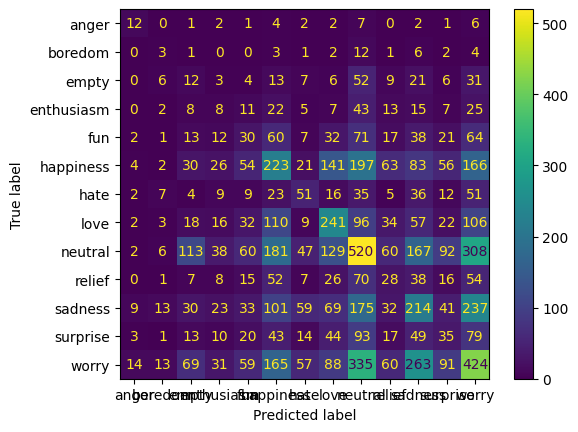

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dt_model, X_test_tfidf, y_test)

In [ ]:
import pickle

with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
